In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import resize
from skimage import color

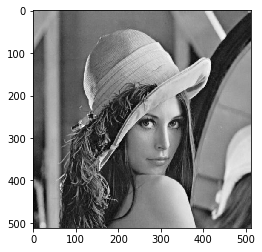

In [2]:
img = io.imread("lena.jpg")
gray_img = color.rgb2gray(img)
plt.imshow(gray_img, cmap= plt.get_cmap('gray'))
plt.show()

In [4]:
from scipy import signal

def gkern(kernlen=21, std=3):
    gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return gkern2d

In [5]:
window=5
offset= window//2
gwindow =gkern(window,1.4)
row,col = gray_img.shape
if row%2==0:
    h = row-offset
else:
    h = row-offset-1
if col%2==0:
    w = row-offset
else:
    w = row-offset-1
nextLevel= np.zeros((w//2-1,h//2-1))
for i in range(2, w):
    for j in range(2, h):
        if j%2==0 and i%2==0:
            patch = gray_img[i-offset:i+offset+1,j-offset:j+offset+1]
            psum= np.dot(patch,gwindow).sum()
            nextLevel[(i//2)-1,(j//2)-1] = psum
            

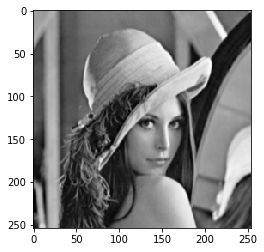

In [16]:
plt.imshow(nextLevel,cmap=plt.get_cmap('gray'))
plt.show()

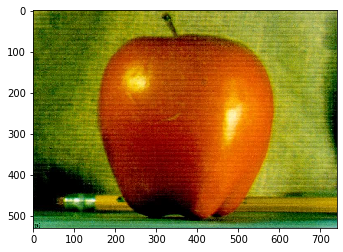

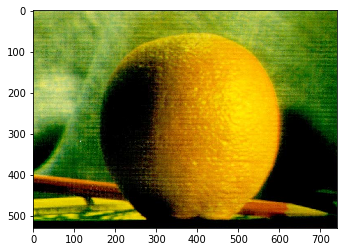

In [80]:
apple = io.imread('burt_apple.png')
orange = io.imread('burt_orange.png')
plt.imshow(apple)
plt.show()
plt.imshow(orange)
plt.show()

In [81]:
tmp = apple.copy()
AGpyr = [tmp]
for i in range(6):
    tmp = cv2.pyrDown(tmp)
    AGpyr.append(tmp)

In [82]:
tmp = orange.copy()
OGpyr = [tmp]
for i in range(6):
    tmp = cv2.pyrDown(tmp)
    OGpyr.append(tmp)

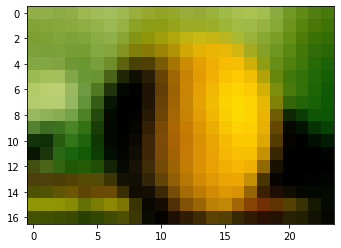

In [83]:
plt.imshow(OGpyr[5])
plt.show()

In [84]:
lpA = [AGpyr[5]]
for i in range(5,0,-1):
    s = (AGpyr[i-1].shape[1],AGpyr[i-1].shape[0])
    tmp = cv2.pyrUp(AGpyr[i], dstsize = s)
    res = np.subtract(AGpyr[i-1],tmp)
    lpA.append(res)

In [85]:
lpO = [OGpyr[5]]
for i in range(5,0,-1):
    s = (OGpyr[i-1].shape[1],OGpyr[i-1].shape[0])
    tmp = cv2.pyrUp(OGpyr[i], dstsize = s)
    res = np.subtract(OGpyr[i-1],tmp)
    lpO.append(res)

In [89]:
LS = []
for la,lb in zip(lpA,lpO):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2,:], lb[:,cols//2:,:]))
    LS.append(ls)

In [90]:
ls_ = LS[0]
for i in range(1,6):
    s = (LS[i].shape[1],LS[i].shape[0])
    ls_ = cv2.pyrUp(ls_, dstsize = s)
    ls_ = cv2.add(ls_, LS[i])

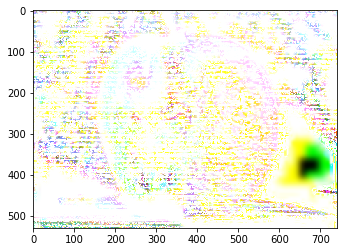

In [92]:
plt.imshow(ls_)
plt.show()